In [1]:
import torch
import numpy as np
import cloudpickle as pickle
import os
from tqdm.auto import tqdm
import seaborn as sns
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [2]:
ck = '/home/sergei/ray_results/ve5_test_fit_single_sample/main_fcn_0e65e_00000_0_2020-12-06_23-40-35/checkpoint_0/checkpoint'

In [36]:
learner = pickle.load(open(ck, 'rb'))

Make environment VectorIncrement-v0 None {}
Using device cpu


In [37]:
#for i in tqdm(range(1000)):
#    _ = learner._epoch()

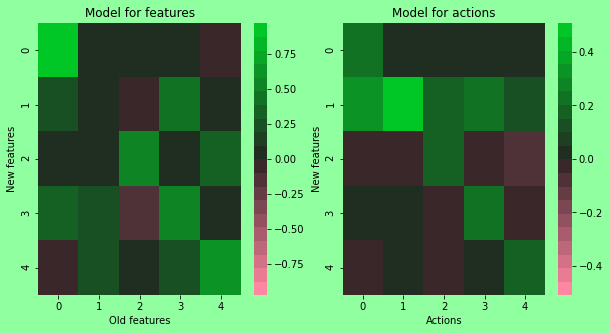

In [110]:
_ = learner.visualize_model()

In [310]:
# obtaining data
learner = pickle.load(open(ck, 'rb'))
mse = torch.nn.MSELoss()

Make environment VectorIncrement-v0 None {}
Using device cpu


In [311]:
opt = torch.optim.Adam(learner.model.parameters(), lr=1e-2)

In [312]:
learner.collect_steps()

In [315]:
c = learner._context


for _ in tqdm(range(1000)):
#     learner.collect_steps()
    opt.zero_grad()
    loss = learner.config.get('losses')['fit']['fcn'](**c) ** 2
#     loss = mse(learner.model(c['obs_x'], c['action_x']), c['obs_y'])
#     loss = mse(learner.model(learner.decoder(c['obs_x']), c['action_x']), learner.decoder(c['obs_y']))
    loss.backward()
    opt.step()
loss ** 0.5

tensor(2.8061e-07, grad_fn=<PowBackward0>)

In [296]:
learner.collect_steps()
c = learner._context
print(mse(learner.model(c['obs_x'], c['action_x']), c['obs_y']) ** 0.5)
print(learner.config.get('losses')['fit']['fcn'](**c))

tensor(2.6059e-07, grad_fn=<PowBackward0>)
tensor(2.6059e-07, grad_fn=<PowBackward0>)


In [274]:
learner.config.get('losses')['fit']['fcn']

<function sparse_causal_model_learner_rl.loss.losses.fit_loss(obs_x, obs_y, action_x, decoder, model, **kwargs)>

In [217]:
cx = c['obs_x'] / 0.2
cy = c['obs_y'] / 0.2
ax = c['action_x']

In [8]:
torch.max(torch.abs(cx + ax - cy))

RuntimeError: operation does not have an identity.

In [49]:
learner.model.load_state_dict(dict(learner.model.state_dict()))

<All keys matched successfully>

In [67]:
learner.model.load_state_dict({'fc_features.weight': torch.eye(5), 'fc_action.weight': torch.eye(5) * 0.2})

<All keys matched successfully>

tensor(1.8545e-08, grad_fn=<PowBackward0>)

In [316]:
learner.model.state_dict()

OrderedDict([('fc_features.weight',
              tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
                      [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
                      [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
                      [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
                      [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]])),
             ('fc_action.weight',
              tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
                      [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
                      [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
                      [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
                      [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]]))])

In [322]:
list(learner.model.parameters())

[Parameter containing:
 tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
         [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
         [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
         [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
         [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
         [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
         [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
         [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
         [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]],
        requires_grad=True)]

In [326]:
list(learner.model.named_parameters())

[('fc_features.weight',
  Parameter containing:
  tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
          [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
          [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
          [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
          [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]],
         requires_grad=True)),
 ('fc_action.weight',
  Parameter containing:
  tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
          [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
          [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
          [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
          [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]],
         requires_grad=True))]